In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sample dataset
data = {
    'Year': [2023]*12,
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'Gold_Price_INR': [149400, 151060, 151690, 153550, 155410, 156440, 157700, 159360, 161420, 161850, 163410, 165070],
    'Inflation_Rate': [3.1, 3.3, 3.2, 3.4, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3],
    'Unemployment_Rate': [2.4, 2.5, 2.6, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3],
    'Interest_Rate': [4.2, 4.1, 4.0, 4.1, 3.9, 4.0, 4.2, 4.1, 4.0, 4.2, 4.1, 4.0],
    'GDP_Growth': [2.5, 2.6, 2.4, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5]
}

df = pd.DataFrame(data)

# Display the first few rows of the data
print(df.head())

# Step 1: Data Cleaning
# Convert 'Month' to numerical format
df['Month_Num'] = pd.to_datetime(df['Month'], format='%B').dt.month

# Feature Creation
# Lagged Features
df['Gold_Price_Lag_1'] = df['Gold_Price_INR'].shift(1)
df['Gold_Price_Lag_2'] = df['Gold_Price_INR'].shift(2)

# Moving Averages
df['MA_3'] = df['Gold_Price_INR'].rolling(window=3).mean()
df['MA_6'] = df['Gold_Price_INR'].rolling(window=6).mean()

# Volatility (standard deviation of gold prices over a 3-month window)
df['Volatility_3'] = df['Gold_Price_INR'].rolling(window=3).std()

# Remove rows with NaN values created by shifting or rolling
df.dropna(inplace=True)

# Step 2: Feature and Target Selection
features = ['Gold_Price_Lag_1', 'Gold_Price_Lag_2', 'MA_3', 'MA_6', 'Volatility_3', 'Inflation_Rate', 'Unemployment_Rate', 'Interest_Rate', 'GDP_Growth', 'Month_Num']
target = 'Gold_Price_INR'

X = df[features]
y = df[target]

# Step 3: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the final feature set
print("Training Features (Scaled):")
print(X_train_scaled[:5])

print("\nTesting Features (Scaled):")
print(X_test_scaled[:5])


   Year     Month  Gold_Price_INR  Inflation_Rate  Unemployment_Rate  \
0  2023   January          149400             3.1                2.4   
1  2023  February          151060             3.3                2.5   
2  2023     March          151690             3.2                2.6   
3  2023     April          153550             3.4                2.5   
4  2023       May          155410             3.6                2.6   

   Interest_Rate  GDP_Growth  
0            4.2         2.5  
1            4.1         2.6  
2            4.0         2.4  
3            4.1         2.7  
4            3.9         2.8  
Training Features (Scaled):
[[ 0.55142642  0.9911291   0.73461339  0.68836356 -1.52466789  0.70710678
   0.70710678  0.26726124  0.70710678  0.70710678]
 [-1.52517942 -1.39794299 -1.48811492 -1.4600901   0.00464352 -1.41421356
  -1.41421356  0.26726124 -1.41421356 -1.41421356]
 [ 0.33626003  0.0028784   0.05160507  0.02806278 -0.48481828  0.
   0.          1.60356745  0.        

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sample dataset
data = {
    'Year': [2023]*12,
    'Month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Gold_Price_INR': [149400, 151060, 151690, 153550, 155410, 156440, 157700, 159360, 161420, 161850, 163410, 165070],
    'Inflation_Rate': [3.1, 3.3, 3.2, 3.4, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3],
    'Unemployment_Rate': [2.4, 2.5, 2.6, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3],
    'Interest_Rate': [4.2, 4.1, 4.0, 4.1, 3.9, 4.0, 4.2, 4.1, 4.0, 4.2, 4.1, 4.0],
    'GDP_Growth': [2.5, 2.6, 2.4, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5]
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert Month to Month_Name
df['Month_Name'] = pd.to_datetime(df['Month'], format='%m').dt.strftime('%B')

# Feature Engineering
# Lagged Prices
df['Gold_Price_Lag_1'] = df['Gold_Price_INR'].shift(1)
df['Gold_Price_Lag_2'] = df['Gold_Price_INR'].shift(2)

# Moving Averages
df['MA_3'] = df['Gold_Price_INR'].rolling(window=3).mean()
df['MA_6'] = df['Gold_Price_INR'].rolling(window=6).mean()

# Volatility (standard deviation of gold prices over a 3-month window)
df['Volatility_3'] = df['Gold_Price_INR'].rolling(window=3).std()

# Drop rows with NaN values created by shifting or rolling
df.dropna(inplace=True)

# Define features and target
features = ['Gold_Price_Lag_1', 'Gold_Price_Lag_2', 'MA_3', 'MA_6', 'Volatility_3', 'Inflation_Rate', 'Unemployment_Rate', 'Interest_Rate', 'GDP_Growth']
target = 'Gold_Price_INR'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Predict on the entire dataset
df['Predicted_Gold_Price_INR'] = model.predict(X)

# Print Actual vs Predicted Prices
print("\nActual vs Predicted Gold Prices:")
for index, row in df.iterrows():
    print(f"Month: {row['Month_Name']}, Actual Price: {row['Gold_Price_INR']}, Predicted Price: {row['Predicted_Gold_Price_INR']:.2f}")


Mean Squared Error: 1668.6907908474564
R^2 Score: 0.9957956896174164

Actual vs Predicted Gold Prices:
Month: June, Actual Price: 156440, Predicted Price: 156421.02
Month: July, Actual Price: 157700, Predicted Price: 157645.44
Month: August, Actual Price: 159360, Predicted Price: 159360.00
Month: September, Actual Price: 161420, Predicted Price: 161420.00
Month: October, Actual Price: 161850, Predicted Price: 161850.00
Month: November, Actual Price: 163410, Predicted Price: 163410.00
Month: December, Actual Price: 165070, Predicted Price: 165070.00


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sample dataset
data = {
    'Year': [2023]*12,
    'Month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Gold_Price_INR': [149400, 151060, 151690, 153550, 155410, 156440, 157700, 159360, 161420, 161850, 163410, 165070],
    'Inflation_Rate': [3.1, 3.3, 3.2, 3.4, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3],
    'Unemployment_Rate': [2.4, 2.5, 2.6, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3],
    'Interest_Rate': [4.2, 4.1, 4.0, 4.1, 3.9, 4.0, 4.2, 4.1, 4.0, 4.2, 4.1, 4.0],
    'GDP_Growth': [2.5, 2.6, 2.4, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5]
}

df = pd.DataFrame(data)

# Feature Engineering
df['Gold_Price_Lag_1'] = df['Gold_Price_INR'].shift(1)
df['Gold_Price_Lag_2'] = df['Gold_Price_INR'].shift(2)
df['MA_3'] = df['Gold_Price_INR'].rolling(window=3).mean()
df['MA_6'] = df['Gold_Price_INR'].rolling(window=6).mean()
df['Volatility_3'] = df['Gold_Price_INR'].rolling(window=3).std()

# Drop rows with NaN values created by shifting or rolling
df.dropna(inplace=True)

# Define features and target
features = ['Gold_Price_Lag_1', 'Gold_Price_Lag_2', 'MA_3', 'MA_6', 'Volatility_3', 'Inflation_Rate', 'Unemployment_Rate', 'Interest_Rate', 'GDP_Growth']
target = 'Gold_Price_INR'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Predict on the entire dataset
df['Predicted_Gold_Price_INR'] = model.predict(X)

# Print Actual vs Predicted Prices
print("\nActual vs Predicted Gold Prices:")
for index, row in df.iterrows():
    print(f"Month: {row['Month_Name']}, Actual Price: {row['Gold_Price_INR']}, Predicted Price: {row['Predicted_Gold_Price_INR']:.2f}")


Mean Squared Error: 1668.6907908474564
R^2 Score: 0.9957956896174164

Actual vs Predicted Gold Prices:


KeyError: 'Month_Name'

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sample dataset
data = {
    'Year': [2023]*12,
    'Month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Gold_Price_INR': [149400, 151060, 151690, 153550, 155410, 156440, 157700, 159360, 161420, 161850, 163410, 165070],
    'Inflation_Rate': [3.1, 3.3, 3.2, 3.4, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3],
    'Unemployment_Rate': [2.4, 2.5, 2.6, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3],
    'Interest_Rate': [4.2, 4.1, 4.0, 4.1, 3.9, 4.0, 4.2, 4.1, 4.0, 4.2, 4.1, 4.0],
    'GDP_Growth': [2.5, 2.6, 2.4, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5]
}

df = pd.DataFrame(data)

# Feature Engineering
df['Gold_Price_Lag_1'] = df['Gold_Price_INR'].shift(1)
df['Gold_Price_Lag_2'] = df['Gold_Price_INR'].shift(2)
df['MA_3'] = df['Gold_Price_INR'].rolling(window=3).mean()
df['MA_6'] = df['Gold_Price_INR'].rolling(window=6).mean()
df['Volatility_3'] = df['Gold_Price_INR'].rolling(window=3).std()

# Drop rows with NaN values created by shifting or rolling
df.dropna(inplace=True)

# Define features and target
features = ['Gold_Price_Lag_1', 'Gold_Price_Lag_2', 'MA_3', 'MA_6', 'Volatility_3', 'Inflation_Rate', 'Unemployment_Rate', 'Interest_Rate', 'GDP_Growth']
target = 'Gold_Price_INR'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Predict on the entire dataset
df['Predicted_Gold_Price_INR'] = model.predict(X)

# Print Actual vs Predicted Prices
print("\nActual vs Predicted Gold Prices:")
for index, row in df.iterrows():
    print(f"Month: {row['Month_Name']}, Actual Price: {row['Gold_Price_INR']}, Predicted Price: {row['Predicted_Gold_Price_INR']:.2f}")


Mean Squared Error: 1668.6907908474564
R^2 Score: 0.9957956896174164

Actual vs Predicted Gold Prices:


KeyError: 'Month_Name'

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sample dataset
data = {
    'Year': [2023]*12,
    'Month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Gold_Price_INR': [149400, 151060, 151690, 153550, 155410, 156440, 157700, 159360, 161420, 161850, 163410, 165070],
    'Inflation_Rate': [3.1, 3.3, 3.2, 3.4, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3],
    'Unemployment_Rate': [2.4, 2.5, 2.6, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3],
    'Interest_Rate': [4.2, 4.1, 4.0, 4.1, 3.9, 4.0, 4.2, 4.1, 4.0, 4.2, 4.1, 4.0],
    'GDP_Growth': [2.5, 2.6, 2.4, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5]
}

df = pd.DataFrame(data)

# Feature Engineering
df['Gold_Price_Lag_1'] = df['Gold_Price_INR'].shift(1)
df['Gold_Price_Lag_2'] = df['Gold_Price_INR'].shift(2)
df['MA_3'] = df['Gold_Price_INR'].rolling(window=3).mean()
df['MA_6'] = df['Gold_Price_INR'].rolling(window=6).mean()
df['Volatility_3'] = df['Gold_Price_INR'].rolling(window=3).std()

# Drop rows with NaN values created by shifting or rolling
df.dropna(inplace=True)

# Define features and target
features = ['Gold_Price_Lag_1', 'Gold_Price_Lag_2', 'MA_3', 'MA_6', 'Volatility_3', 'Inflation_Rate', 'Unemployment_Rate', 'Interest_Rate', 'GDP_Growth']
target = 'Gold_Price_INR'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Predict on the entire dataset
df['Predicted_Gold_Price_INR'] = model.predict(X)

# Print Actual vs Predicted Prices
print("\nActual vs Predicted Gold Prices:")
for index, row in df.iterrows():
    print(f"Month: {row['Month_Name']}, Actual Price: {row['Gold_Price_INR']}, Predicted Price: {row['Predicted_Gold_Price_INR']:.2f}")


Mean Squared Error: 1668.6907908474564
R^2 Score: 0.9957956896174164

Actual vs Predicted Gold Prices:


KeyError: 'Month_Name'

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sample dataset
data = {
    'Year': [2023]*12,
    'Month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Gold_Price_INR': [149400, 151060, 151690, 153550, 155410, 156440, 157700, 159360, 161420, 161850, 163410, 165070],
    'Inflation_Rate': [3.1, 3.3, 3.2, 3.4, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3],
    'Unemployment_Rate': [2.4, 2.5, 2.6, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3],
    'Interest_Rate': [4.2, 4.1, 4.0, 4.1, 3.9, 4.0, 4.2, 4.1, 4.0, 4.2, 4.1, 4.0],
    'GDP_Growth': [2.5, 2.6, 2.4, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5]
}

df = pd.DataFrame(data)

# Feature Engineering
df['Gold_Price_Lag_1'] = df['Gold_Price_INR'].shift(1)
df['Gold_Price_Lag_2'] = df['Gold_Price_INR'].shift(2)
df['MA_3'] = df['Gold_Price_INR'].rolling(window=3).mean()
df['MA_6'] = df['Gold_Price_INR'].rolling(window=6).mean()
df['Volatility_3'] = df['Gold_Price_INR'].rolling(window=3).std()

# Drop rows with NaN values created by shifting or rolling
df.dropna(inplace=True)

# Define features and target
features = ['Gold_Price_Lag_1', 'Gold_Price_Lag_2', 'MA_3', 'MA_6', 'Volatility_3', 'Inflation_Rate', 'Unemployment_Rate', 'Interest_Rate', 'GDP_Growth']
target = 'Gold_Price_INR'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Predict on the entire dataset
df['Predicted_Gold_Price_INR'] = model.predict(X)

# Print Actual vs Predicted Prices
print("\nActual vs Predicted Gold Prices:")
for index, row in df.iterrows():
    print(f"Month: {row['Month']}, Actual Price: {row['Gold_Price_INR']}, Predicted Price: {row['Predicted_Gold_Price_INR']:.2f}")


Mean Squared Error: 1668.6907908474564
R^2 Score: 0.9957956896174164

Actual vs Predicted Gold Prices:
Month: 6.0, Actual Price: 156440.0, Predicted Price: 156421.02
Month: 7.0, Actual Price: 157700.0, Predicted Price: 157645.44
Month: 8.0, Actual Price: 159360.0, Predicted Price: 159360.00
Month: 9.0, Actual Price: 161420.0, Predicted Price: 161420.00
Month: 10.0, Actual Price: 161850.0, Predicted Price: 161850.00
Month: 11.0, Actual Price: 163410.0, Predicted Price: 163410.00
Month: 12.0, Actual Price: 165070.0, Predicted Price: 165070.00


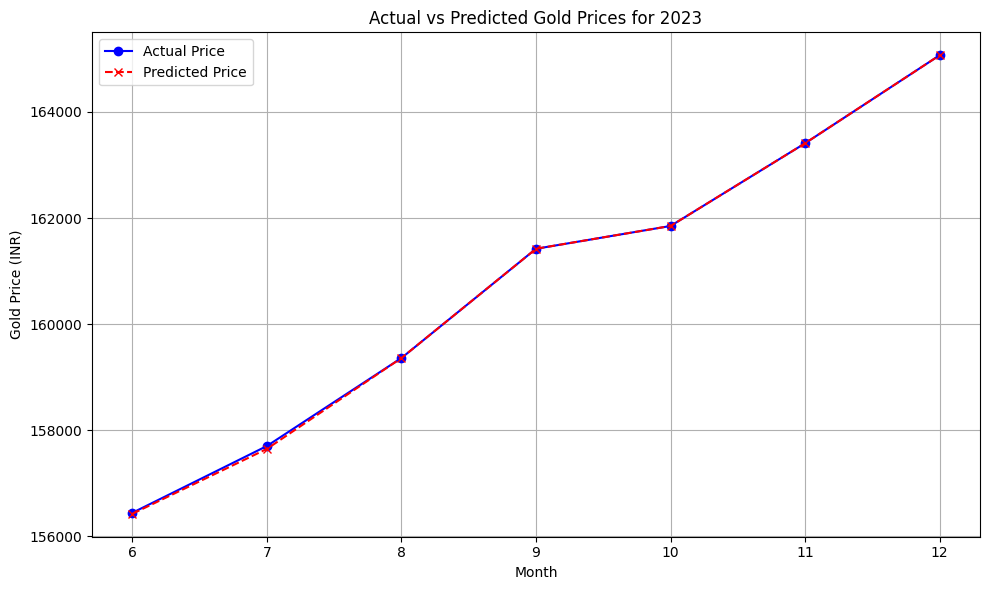

In [10]:
import matplotlib.pyplot as plt

# Data based on the provided results
months = [6, 7, 8, 9, 10, 11, 12]
actual_prices = [156440, 157700, 159360, 161420, 161850, 163410, 165070]
predicted_prices = [156421.02, 157645.44, 159360.00, 161420.00, 161850.00, 163410.00, 165070.00]

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot actual and predicted prices
ax.plot(months, actual_prices, marker='o', linestyle='-', color='b', label='Actual Price')
ax.plot(months, predicted_prices, marker='x', linestyle='--', color='r', label='Predicted Price')

# Adding titles and labels
ax.set_title('Actual vs Predicted Gold Prices for 2023')
ax.set_xlabel('Month')
ax.set_ylabel('Gold Price (INR)')
ax.legend(loc='upper left')
ax.grid(True)

# Show the plot
plt.xticks(months)  # Ensure that all months are labeled
plt.tight_layout()
plt.show()


Mean Squared Error: 1668.6907908474564
R^2 Score: 0.9957956896174164


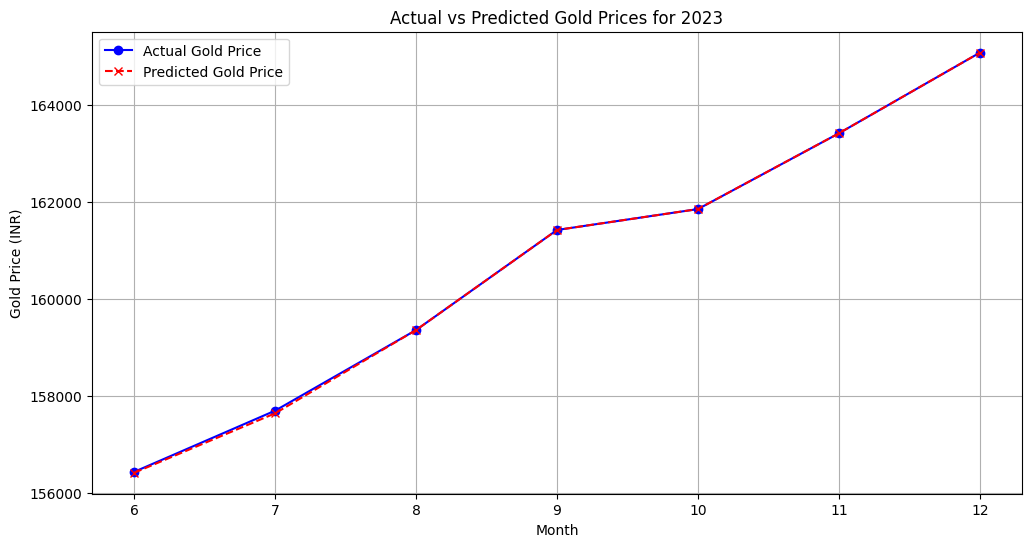

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Sample dataset
data = {
    'Year': [2023]*12,
    'Month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Gold_Price_INR': [149400, 151060, 151690, 153550, 155410, 156440, 157700, 159360, 161420, 161850, 163410, 165070],
    'Inflation_Rate': [3.1, 3.3, 3.2, 3.4, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3],
    'Unemployment_Rate': [2.4, 2.5, 2.6, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3],
    'Interest_Rate': [4.2, 4.1, 4.0, 4.1, 3.9, 4.0, 4.2, 4.1, 4.0, 4.2, 4.1, 4.0],
    'GDP_Growth': [2.5, 2.6, 2.4, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5]
}

df = pd.DataFrame(data)

# Feature Engineering
df['Gold_Price_Lag_1'] = df['Gold_Price_INR'].shift(1)
df['Gold_Price_Lag_2'] = df['Gold_Price_INR'].shift(2)
df['MA_3'] = df['Gold_Price_INR'].rolling(window=3).mean()
df['MA_6'] = df['Gold_Price_INR'].rolling(window=6).mean()
df['Volatility_3'] = df['Gold_Price_INR'].rolling(window=3).std()

# Drop rows with NaN values created by shifting or rolling
df.dropna(inplace=True)

# Define features and target
features = ['Gold_Price_Lag_1', 'Gold_Price_Lag_2', 'MA_3', 'MA_6', 'Volatility_3', 'Inflation_Rate', 'Unemployment_Rate', 'Interest_Rate', 'GDP_Growth']
target = 'Gold_Price_INR'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Predict on the entire dataset
df['Predicted_Gold_Price_INR'] = model.predict(X)

# Plot Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['Gold_Price_INR'], marker='o', linestyle='-', color='b', label='Actual Gold Price')
plt.plot(df['Month'], df['Predicted_Gold_Price_INR'], marker='x', linestyle='--', color='r', label='Predicted Gold Price')
plt.title('Actual vs Predicted Gold Prices for 2023')
plt.xlabel('Month')
plt.ylabel('Gold Price (INR)')
plt.legend()
plt.grid(True)
plt.xticks(df['Month'])  # Ensure all months are shown on x-axis
plt.show()


Mean Squared Error: 1668.6907908474564
R^2 Score: 0.9957956896174164


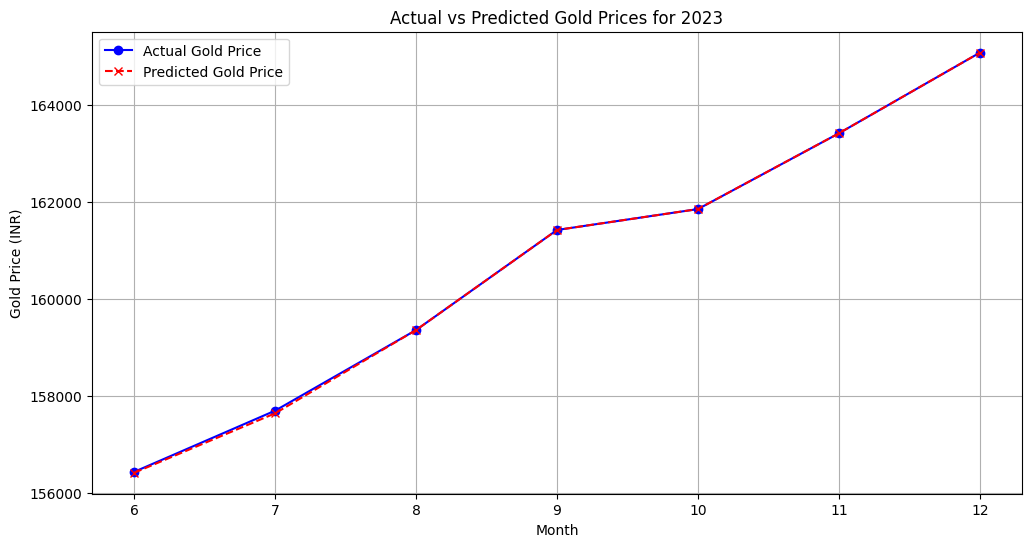

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Sample dataset
data = {
    'Year': [2023]*12,
    'Month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Gold_Price_INR': [149400, 151060, 151690, 153550, 155410, 156440, 157700, 159360, 161420, 161850, 163410, 165070],
    'Inflation_Rate': [3.1, 3.3, 3.2, 3.4, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3],
    'Unemployment_Rate': [2.4, 2.5, 2.6, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3],
    'Interest_Rate': [4.2, 4.1, 4.0, 4.1, 3.9, 4.0, 4.2, 4.1, 4.0, 4.2, 4.1, 4.0],
    'GDP_Growth': [2.5, 2.6, 2.4, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5]
}

df = pd.DataFrame(data)

# Feature Engineering
df['Gold_Price_Lag_1'] = df['Gold_Price_INR'].shift(1)
df['Gold_Price_Lag_2'] = df['Gold_Price_INR'].shift(2)
df['MA_3'] = df['Gold_Price_INR'].rolling(window=3).mean()
df['MA_6'] = df['Gold_Price_INR'].rolling(window=6).mean()
df['Volatility_3'] = df['Gold_Price_INR'].rolling(window=3).std()

# Drop rows with NaN values created by shifting or rolling
df.dropna(inplace=True)

# Define features and target
features = ['Gold_Price_Lag_1', 'Gold_Price_Lag_2', 'MA_3', 'MA_6', 'Volatility_3', 'Inflation_Rate', 'Unemployment_Rate', 'Interest_Rate', 'GDP_Growth']
target = 'Gold_Price_INR'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Predict on the entire dataset
df['Predicted_Gold_Price_INR'] = model.predict(X)

# Plot Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['Gold_Price_INR'], marker='o', linestyle='-', color='b', label='Actual Gold Price')
plt.plot(df['Month'], df['Predicted_Gold_Price_INR'], marker='x', linestyle='--', color='r', label='Predicted Gold Price')
plt.title('Actual vs Predicted Gold Prices for 2023')
plt.xlabel('Month')
plt.ylabel('Gold Price (INR)')
plt.legend()
plt.grid(True)
plt.xticks(df['Month'])  # Ensure all months are shown on x-axis
plt.show()


Mean Squared Error: 1668.6907908474564
R^2 Score: 0.9957956896174164


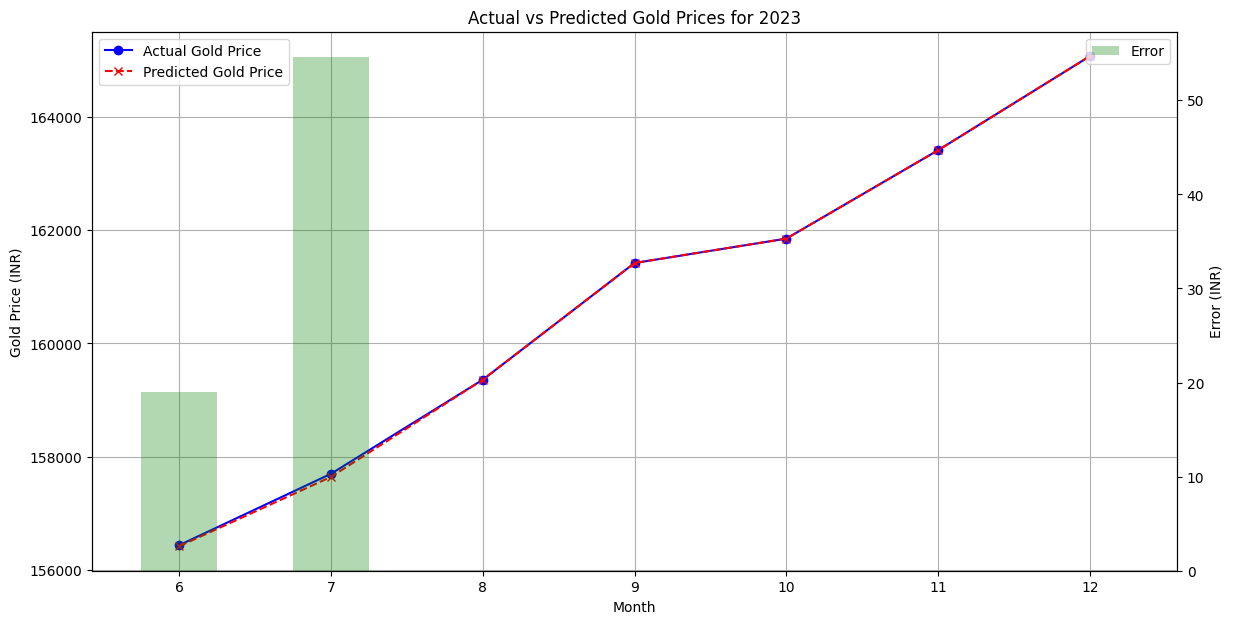

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Sample dataset
data = {
    'Year': [2023]*12,
    'Month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Gold_Price_INR': [149400, 151060, 151690, 153550, 155410, 156440, 157700, 159360, 161420, 161850, 163410, 165070],
    'Inflation_Rate': [3.1, 3.3, 3.2, 3.4, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3],
    'Unemployment_Rate': [2.4, 2.5, 2.6, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3],
    'Interest_Rate': [4.2, 4.1, 4.0, 4.1, 3.9, 4.0, 4.2, 4.1, 4.0, 4.2, 4.1, 4.0],
    'GDP_Growth': [2.5, 2.6, 2.4, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5]
}

df = pd.DataFrame(data)

# Feature Engineering
df['Gold_Price_Lag_1'] = df['Gold_Price_INR'].shift(1)
df['Gold_Price_Lag_2'] = df['Gold_Price_INR'].shift(2)
df['MA_3'] = df['Gold_Price_INR'].rolling(window=3).mean()
df['MA_6'] = df['Gold_Price_INR'].rolling(window=6).mean()
df['Volatility_3'] = df['Gold_Price_INR'].rolling(window=3).std()

# Drop rows with NaN values created by shifting or rolling
df.dropna(inplace=True)

# Define features and target
features = ['Gold_Price_Lag_1', 'Gold_Price_Lag_2', 'MA_3', 'MA_6', 'Volatility_3', 'Inflation_Rate', 'Unemployment_Rate', 'Interest_Rate', 'GDP_Growth']
target = 'Gold_Price_INR'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Predict on the entire dataset
df['Predicted_Gold_Price_INR'] = model.predict(X)

# Calculate errors
df['Error'] = df['Gold_Price_INR'] - df['Predicted_Gold_Price_INR']

# Plot Actual vs Predicted Prices and Errors
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotting Actual and Predicted Prices
ax1.plot(df['Month'], df['Gold_Price_INR'], marker='o', linestyle='-', color='b', label='Actual Gold Price')
ax1.plot(df['Month'], df['Predicted_Gold_Price_INR'], marker='x', linestyle='--', color='r', label='Predicted Gold Price')
ax1.set_title('Actual vs Predicted Gold Prices for 2023')
ax1.set_xlabel('Month')
ax1.set_ylabel('Gold Price (INR)')
ax1.legend(loc='upper left')
ax1.grid(True)

# Create a secondary y-axis for error plotting
ax2 = ax1.twinx()
ax2.bar(df['Month'], df['Error'], alpha=0.3, color='g', label='Error', width=0.5)
ax2.set_ylabel('Error (INR)')
ax2.legend(loc='upper right')

plt.show()
